In [ ]:
def f(x):
    # return the y value
    # not sure what function should be put here
    # log normal function?
    return scipy.stats.lognorm(sigma, scale=np.exp(mu))

x_initial = np.array([0, 0, 0, 0])
result = minimize(f, x_initial)

\begin{align}
\mu & = 2.3 \\
var(\mu) = \frac{\beta}{(\alpha-1)\lambda} & = 0.5 \\
\sigma^2 = \frac{\beta}{(\alpha-1)} & = 2.75 \\
var(\sigma^2) & = 1
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
data = np.concatenate((np.zeros(34), np.ones(107)))

In [2]:
alpha_prior = 1
beta_prior = 1
prior = stats.beta(a=alpha_prior, b=beta_prior)

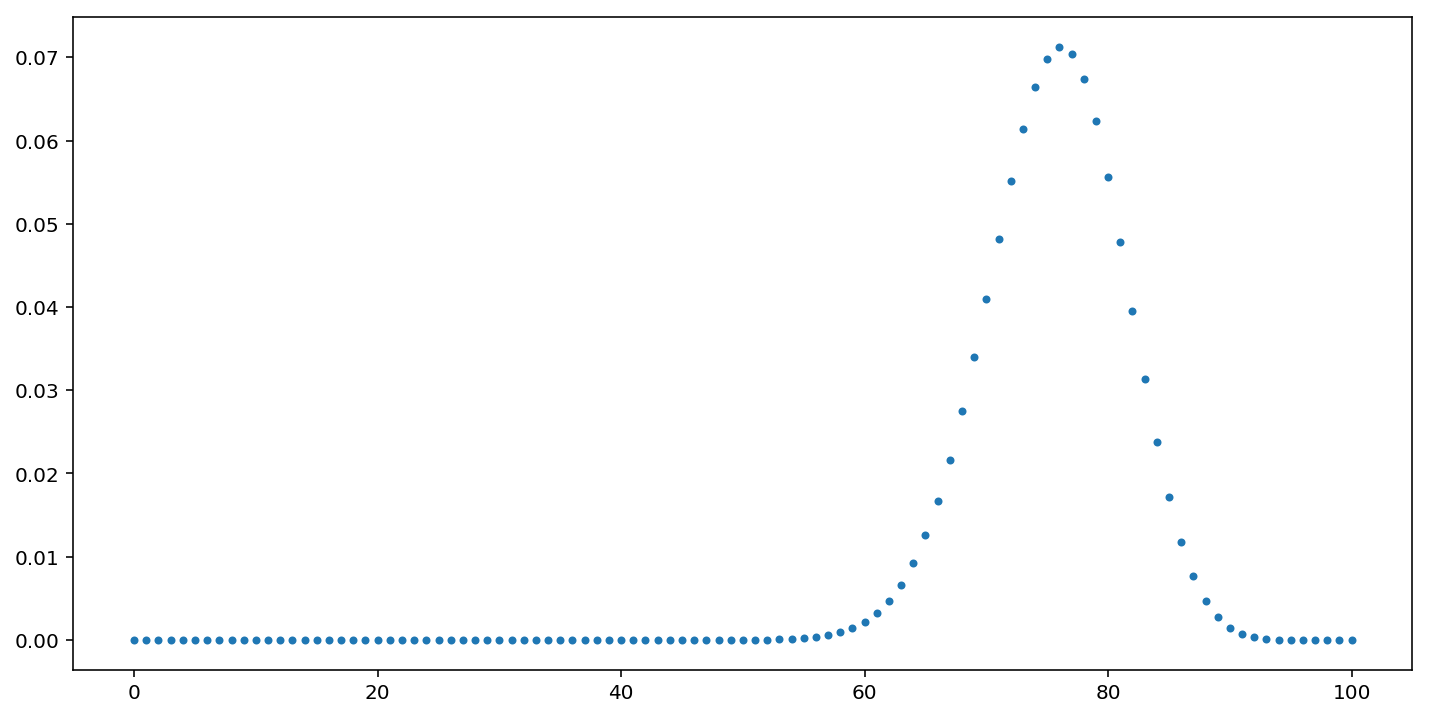

In [11]:
# Beta-binomial pmf with 100 patients and alpha_post and beta_post parameters
# https://en.wikipedia.org/wiki/Beta-binomial_distribution
def beta_binomial_pmf(k, n, alpha, beta):
    from scipy.special import betaln, comb
    log_pmf = np.log(comb(n, k)) + betaln(k + alpha, n - k + beta) - betaln(alpha, beta)
    return np.exp(log_pmf)

x = np.arange(0, 101)
y = beta_binomial_pmf(x, 100, alpha_post, beta_post)
plt.figure(figsize=(12, 6))
plt.plot(x, y, '.')
plt.show()

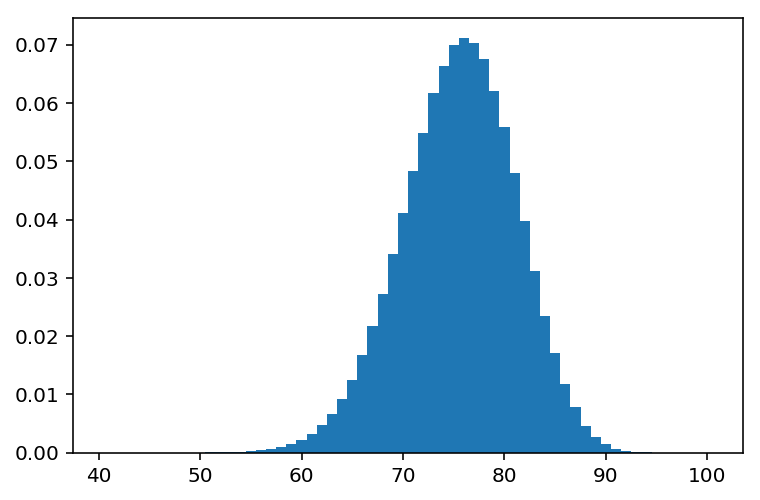

In [12]:
# Using sampling from posterior + likelihood for posterior predictive
samples = 1000000
counts = stats.binom.rvs(100, posterior.rvs(size=samples), size=samples)
plt.hist(counts, bins=np.arange(40, 101) + 0.5, density=True)
plt.show()

In [13]:
print('Probability that at least 2/3 of patients get better: %.3f' %
      (1 - posterior.cdf(2/3)))
print('Probability that at least 75%% of patients get better: %.3f' %
      (1 - posterior.cdf(0.75)))

Probability that at least 2/3 of patients get better: 0.990
Probability that at least 75% of patients get better: 0.571
